In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1) Import required libraries**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import tensorflow as tf

import seaborn as sn


import math
import datetime
import platform


from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded required libraries...")

Loaded required libraries...


In [ ]:
tf.__version__

'2.5.0'

**2) Data loading and exploration**

In [ ]:
fpath = "/content/drive/MyDrive/Thesis Image"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Calamansi', 'sunflowers', 'Puthi Karpash'] 

No. of categories =  3


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}") 
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((224, 224))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3212 
No. of labels loaded =  3212
<class 'list'> <class 'list'>


In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3212, 224, 224, 3) 
Labels shape =  (3212,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Training data shape :  (3212, 224, 224, 3) (3212,)
Total number of outputs :  3
Output classes :  [0 1 2]


Text(0.5, 1.0, 'Leaf : 0')

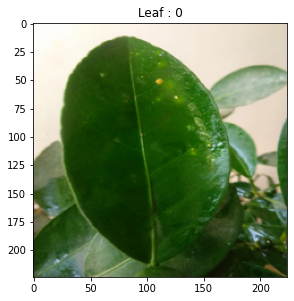

In [ ]:
print('Training data shape : ', images.shape,labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(images[25,:,:], cmap='gray')
plt.title("Leaf : {}".format(labels[25]))

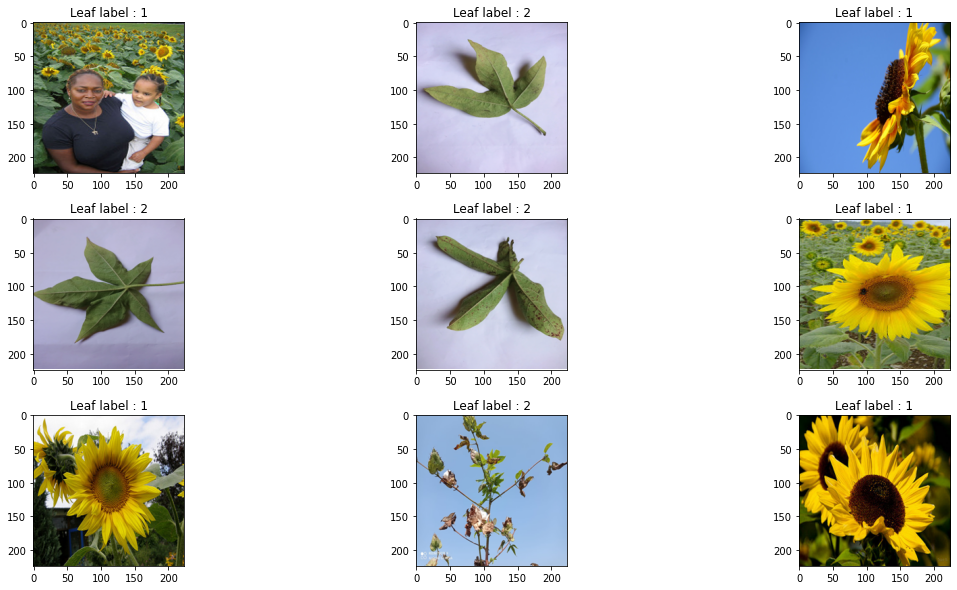

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        #plt.figure(figsize=[10,5])

        plt.title('Leaf label : {}'.format(labels[r[0]]))
#        plt.xticks([])
#       plt.yticks([])
      
    plt.show()
    
display_rand_images(images, labels)

**3) Prepare data for CNN model training**

Step 1 - shuffle the data loaded from the dataset

In [ ]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
#print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
#print("\n'n' values after shuffling = ",n)

In [ ]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3212, 224, 224, 3) 
Labels shape after shuffling =  (3212,)


Step 2 - Data normalization

In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3212, 224, 224, 3)


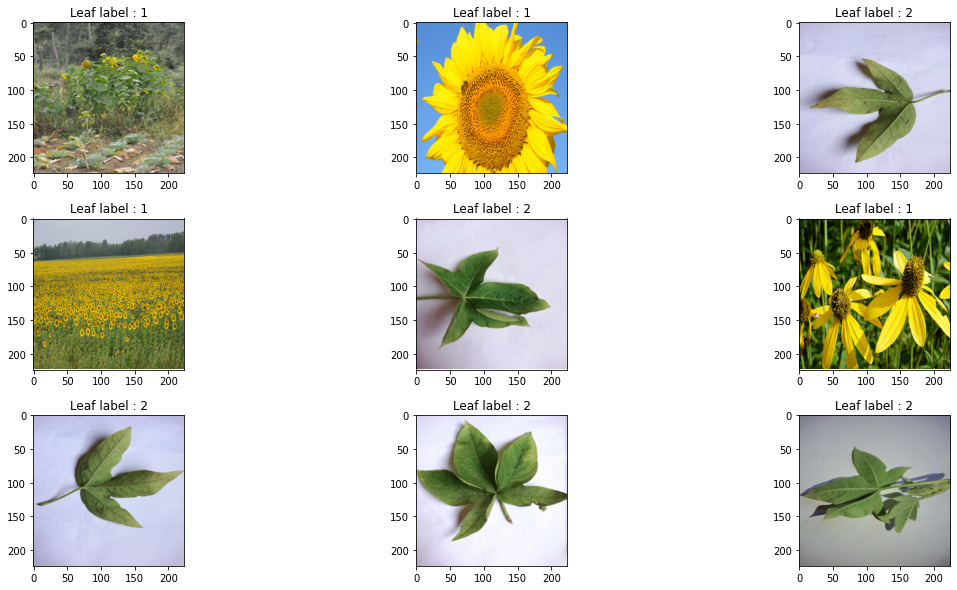

In [ ]:
display_rand_images(images, labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2569, 224, 224, 3)
y_train shape =  (2569,)

x_test shape =  (643, 224, 224, 3)
y_test shape =  (643,)


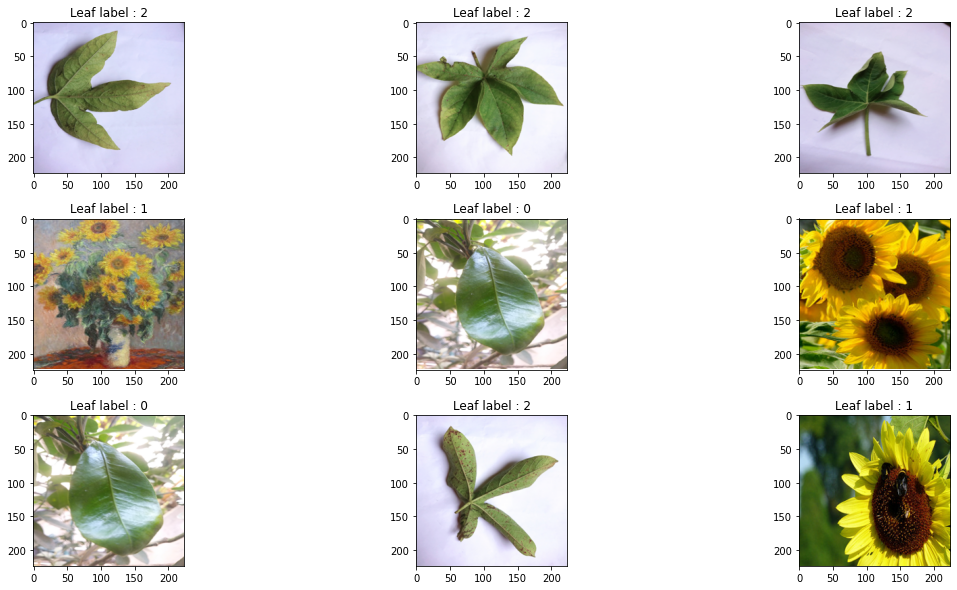

In [ ]:
display_rand_images(x_train, y_train)

**4) Define CNN model (AlexNet)**

In [ ]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=64,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=(224,224,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=128,kernel_size=(5,5),strides=(2,2),padding="same",activation="relu"))
#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(2,2),padding="same",activation="relu"))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(units=1000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=400,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=3,activation="softmax"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 56, 56, 64)        23296     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 27, 27, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       204928    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)        

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist= model.fit(x_train, y_train, epochs=10)

Epoch 1/10
81/81 [==============================] - 70s 631ms/step - loss: 0.3109 - accuracy: 0.8899
Epoch 2/10
81/81 [==============================] - 51s 632ms/step - loss: 0.0498 - accuracy: 0.9886
Epoch 3/10
81/81 [==============================] - 51s 633ms/step - loss: 0.0242 - accuracy: 0.9915
Epoch 4/10
81/81 [==============================] - 51s 629ms/step - loss: 0.0287 - accuracy: 0.9887
Epoch 5/10
81/81 [==============================] - 51s 630ms/step - loss: 0.0228 - accuracy: 0.9940
Epoch 6/10
81/81 [==============================] - 51s 628ms/step - loss: 0.0419 - accuracy: 0.9883
Epoch 7/10
81/81 [==============================] - 51s 629ms/step - loss: 0.0972 - accuracy: 0.9800
Epoch 8/10
81/81 [==============================] - 51s 627ms/step - loss: 0.0407 - accuracy: 0.9924
Epoch 9/10
81/81 [==============================] - 51s 631ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 10/10
81/81 [==============================] - 51s 633ms/step - loss: 0.0040 - accura

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

21/21 [==============================] - 4s 165ms/step - loss: 0.0569 - accuracy: 0.9922
0.0568561777472496 0.9922239780426025


Display few random images with actual vs predicted values of labels

In [ ]:
pred = model.predict(x_test)

pred.shape

(643, 3)

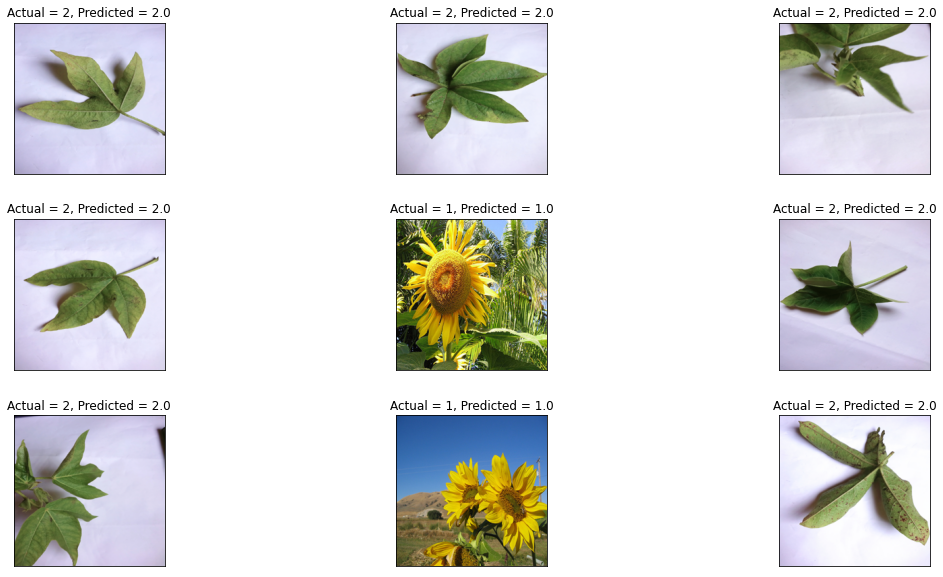

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

**Accuracy Graph**

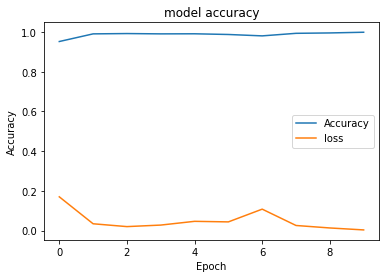

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])

plt.plot(hist.history['loss'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

In [ ]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=64,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=(224,224,3)))
#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=128,kernel_size=(5,5),strides=(2,2),padding="same",activation="relu"))
model.add(Dropout(0.4))
#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(2,2),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units=1000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=400,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=3,activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 56, 56, 64)        23296     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 27, 27, 64)        256       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       204928    
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 6, 6, 128)        

In [ ]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=8,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test),
)

Fit model on training data
Epoch 1/8
41/41 [==============================] - 56s 1s/step - loss: 0.3232 - accuracy: 0.8974 - val_loss: 4.3552 - val_accuracy: 0.2224
Epoch 2/8
41/41 [==============================] - 54s 1s/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 0.3278 - val_accuracy: 0.8787
Epoch 3/8
41/41 [==============================] - 54s 1s/step - loss: 0.0219 - accuracy: 0.9938 - val_loss: 1.4351 - val_accuracy: 0.8663
Epoch 4/8
41/41 [==============================] - 54s 1s/step - loss: 0.0188 - accuracy: 0.9954 - val_loss: 0.3959 - val_accuracy: 0.9098
Epoch 5/8
41/41 [==============================] - 54s 1s/step - loss: 0.0941 - accuracy: 0.9874 - val_loss: 0.1108 - val_accuracy: 0.9736
Epoch 6/8
41/41 [==============================] - 54s 1s/step - loss: 0.0113 - accuracy: 0.9950 - val_loss: 0.2539 - val_accuracy: 0.9409
Epoch 7/8
41/41 [==============================] - 54s 1s/step - loss: 0.0149 - accuracy: 0.9943 - val_loss: 0.0907 - val_accuracy: 0.9689


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

21/21 [==============================] - 3s 164ms/step - loss: 14.2001 - accuracy: 0.5552
14.200125694274902 0.5552099347114563


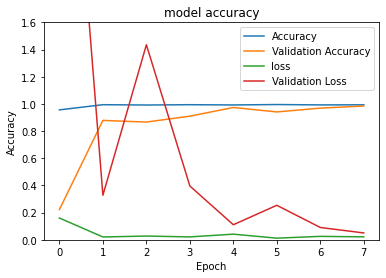

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 8))
plt.ylim([min(plt.ylim()),1.6])
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])

plt.show()

**7) Save trained model, weights**

In [ ]:
# save model in JSON format
model_json = model.to_json()
json_file = open("/content/drive/MyDrive/Colab Notebooks/model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/content/model1.h5")
print("\nModel weights saved!")

Model saved in JSON format!

Model weights saved!


**Convert To tflite**

**Convert To tflite**

In [ ]:
# save model in tflite
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('model.tflite')
